In [2]:
import string
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

In [3]:
df = pd.read_table("data.csv", sep = ",")
display(df.head(n=15))

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,"Wiltshire, England Niagara Falls, NY"
1,1,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,NaN
2,2,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,NaN
3,3,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,NaN
4,4,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"
5,5,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S,"Cornwall / Camden, NJ"
6,6,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S,NaN
7,7,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S,NaN
8,8,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S,Glasgow
9,9,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,NaN


In [4]:
data_OG = df

# Předzpracování dat
Nechám si vypsat zákkladní údaje o datech. Obzvlástě mě oak zajímají datové typy a počty unikátních hodnot jednotlivých příznaků.

In [5]:
display(df.shape)
display(df.info())
display(df.describe())
display(df.nunique())
display(df.dtypes)

(1000, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      233 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  566 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


None

,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.00000,1000.000000,802.000000,1000.000000,1000.00000,999.000000
mean,499.500000,0.39800,2.288000,29.850686,0.496000,0.40200,34.264352
std,288.819436,0.48973,0.840096,14.328743,1.024223,0.91719,53.315077
min,0.000000,0.00000,1.000000,0.166700,0.000000,0.00000,0.000000
25%,249.750000,0.00000,1.750000,21.000000,0.000000,0.00000,7.925000
50%,499.500000,0.00000,3.000000,28.000000,0.000000,0.00000,14.458300
75%,749.250000,1.00000,3.000000,39.000000,1.000000,0.00000,31.275000
max,999.000000,1.00000,3.000000,80.000000,8.000000,9.00000,512.329200


ID           1000
survived        2
pclass          3
name          999
sex             2
age            95
sibsp           7
parch           8
ticket        746
fare          254
cabin         157
embarked        3
home.dest     313
dtype: int64

ID             int64
survived       int64
pclass         int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
home.dest     object
dtype: object

U indexu cabin je vidět málo hodnot. Můžu předpokládat, že 1000 cestujících nebydlelo pouze v 313 kabinách. Pro ověřeni spočítám počet NaN u daného příznaku. 

In [6]:
df.cabin.isnull().sum()

767

Data chybějí u více než čtvrtiny cestujících. Navíc nejde ani o binární příznak. Pro rozhodovací strom nebude příliš užitečný. 

In [7]:
df.cabin.unique()

array([nan, 'B30', 'C49', 'C83', 'F4', 'C99', 'C62 C64',
       'B57 B59 B63 B66', 'B102', 'B58 B60', 'B5', 'D20', 'D40', 'B101',
       'B37', 'F E57', 'C78', 'E121', 'B41', 'C116', 'E58', 'C124', 'D15',
       'E77', 'B69', 'E101', 'C52', 'C92', 'D19', 'C23 C25 C27', 'D17',
       'B24', 'B96 B98', 'B22', 'D', 'B50', 'C22 C26', 'B45', 'C103',
       'D46', 'B39', 'B35', 'E25', 'C65', 'F38', 'A24', 'C47', 'C91',
       'C7', 'F2', 'E24', 'C80', 'A6', 'C148', 'C106', 'E12', 'C54',
       'D30', 'B73', 'D28', 'C123', 'C51', 'E63', 'A19', 'F G63', 'E46',
       'C46', 'C126', 'B49', 'D37', 'E36', 'B18', 'D26', 'B77', 'A11',
       'A34', 'A20', 'B79', 'E44', 'C93', 'D33', 'F33', 'A5', 'D36',
       'C32', 'B28', 'C89', 'C39', 'C30', 'C101', 'B71', 'E10', 'E33',
       'D11', 'C55 C57', 'F E69', 'B10', 'B51 B53 B55', 'B4', 'E52', 'F',
       'E34', 'E67', 'A31', 'D50', 'E60', 'A18', 'G6', 'D48', 'C132',
       'A7', 'C68', 'A36', 'D56', 'A23', 'C2', 'C105', 'D22', 'D35',
       'B78', 'D3

U přiznaku home.dest je 313 unikátních hodnot, nejsou ordinální => adept na vyřazení z příznaků, protože 313 dummy příznaků se zdá být příliš.

In [8]:
display(df["home.dest"].unique())
display(df["home.dest"].isnull().sum())

array(['Wiltshire, England Niagara Falls, NY', nan, 'Greensburg, PA',
       'Cornwall / Camden, NJ', 'Glasgow', 'Greenport, NY', 'London',
       'Providence, RI', 'Paris, France New York, NY', 'New York, NY',
       'Minneapolis, MN', 'London / Chicago, IL',
       'Guntur, India / Benton Harbour, MI', 'Denmark / New York, NY',
       'Ilfracombe, Devon', 'Cornwall, England Houghton, MI',
       'Harrow-on-the-Hill, Middlesex', 'Haverford, PA / Cooperstown, NY',
       'Halesworth, England', 'Newark, NJ', 'Cornwall / Hancock, MI',
       'Ireland', 'London, England Norfolk, VA', 'Paris / Haiti',
       'Montreal, PQ', 'Stockholm, Sweden', 'Southampton', 'Croatia',
       'North Evington, England', 'St Louis, MO', 'Brookline, MA',
       'Aughnacliff, Co Longford, Ireland New York, NY',
       'Bangkok, Thailand / Roseville, IL',
       'Oskarshamn, Sweden Minneapolis, MN', 'Portugal', 'Buffalo, NY',
       'England / San Francisco, CA', 'Green Bay, WI',
       'Zurich, Switzerland', 

434

In [9]:
df["embarked"].isnull().sum()

2

Vedle již zmíněných příznaků cabin a home.dest vyhodím ještě index ticket, protože kód lístku jako takový žádnou informaci nenese. Stejně tak zahodím příznak name.

In [10]:
display(df["ticket"].isnull().sum())
len(df.ticket.unique())

0

746

Pro přetipování nečíselných indexů si nechám vypsat jejich jména.

In [11]:
string_cols = df.select_dtypes(['object']).columns
print(string_cols)

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'home.dest'], dtype='object')


## Nové příznaky

### Pohlaví a místo nalodění
U pohlaví není mezi hodnotami jansá hierarchie, proto použiji one hot encoding. U místa nalodění nalodění není situace tak jednoznačná. Sice by se dalo říci, že ani jedno jedno město není víc než jiné. Nicméně Titanic tato místa objel v nějakém pořadí. Na validační množině se pak ukázalo, že one hot encoding na místě nalodění vede celý model ke globální tendencii predikovat 0. Proto tento příznak převedu na ordinální.  

In [12]:
df["sex"] = df["sex"].astype("category").cat.codes    

# dummy_embarked= pd.get_dummies(df["embarked"])
# df = df.join(dummy_embarked)
# df = df.drop('embarked', axis = 1) #dummy příznaky, zpusobují drop v F1 score u rozhodovacího stromu

df["embarked"] = df["embarked"].astype("category").cat.codes 
df.embarked = df.embarked.replace(0, -1) #odlišení chybějících hodnot

### Paluby

Chtěl jsem vytvořit přízmak na které palubě byl daný cestující ubytován. Nicméně tento příznak rozhodovací strom nevylepšil. Nejspíše důsledek velkého počtu chybějících hodnot v datasetu.

In [13]:
#df["deck"] = df["cabin"].astype(str).str[0]
#df = df.drop('cabin', axis = 1)

#display(df.deck.unique())

In [14]:
# T_deck = df.deck.apply(lambda x: 1 if x == "T" else 0).sum()
# display(T_deck)
# data_OG[data_OG.cabin == "T"] #Kabina T se nacháze na horní palubě a bydlel v ní pouze pan Stephen Weart Blackwell. Na internetu jsem dohledal, že na horní palubě se dále nacházely kajuty U-Z.

In [15]:
#display(df.deck.unique())

In [16]:
#nejak se mi nepodarilo přetipovaní pomoci pd.api.types.CategoricalDtype, tak to provedu ručně
# df.deck = df.deck.replace("n", -1)
# df.deck = df.deck.replace(["T","U","V","W","X","Y","Z"], 1)# Ošetření všech kajut z horní paluby
# df.deck = df.deck.replace(["A"], 2)
# df.deck = df.deck.replace(["B"], 3)
# df.deck = df.deck.replace(["C"], 4)
# df.deck = df.deck.replace(["D"], 5)
# df.deck = df.deck.replace(["E"], 6)
# df.deck = df.deck.replace(["F"], 7)
# df.deck = df.deck.replace(["G"], 8)

In [17]:
#display(df.deck.dtypes)
#df.select_dtypes(['object']).columns

### Rodina
Nový příznak fam bude obsahovat součet všech rodinných příslušníků na palubě. Tato úprava je pak cílena především na kNN,kde by mohla napomoci snížit dimenzionalitu v kombinaci se zahozením původních přízanků sibsp a parch. Vzhledem k tomu, že rozhodovací strom si z příznaků vždy vybírá, přidávám tento příznak už nyní. Navyšuji tak možnost výběru a v nejhorším případě tento příznak stromu nijak nepomůže a pouze spomalí generovaání optimálního řešení.

In [18]:
df["fam"] = df["sibsp"] + df["parch"]

### Dokončení předzpracoání dat

Zbavíme se nevhodných příznaků.

In [19]:
df = df.drop('home.dest', axis = 1)
df = df.drop('cabin', axis = 1)
df = df.drop('ticket', axis = 1)
df = df.drop('name', axis = 1)

Posledním krokem předzpracování dast je vypořádání se s chybějícími hodnotami. Já jsem zvolil nahrazení mínus jedničkou.

In [20]:
df = df.fillna('-1')

In [21]:
df.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked,fam
0,0,0,3,1,11.0,5,2,46.9,2,7
1,1,0,3,1,-1,0,0,7.05,2,0
2,2,0,3,1,4.0,3,2,27.9,2,5
3,3,1,3,0,-1,1,0,15.5,1,1
4,4,1,3,0,18.0,0,0,7.2292,-1,0


## Dělění dat
Rozdělení příznaků a hledane proměnné.

In [22]:
Xdata = df.drop("survived", axis = 1)
ydata = df.survived

Rozdělené dat na trénovací, validační a testovací množiny (v poměru 50:25:25).

In [23]:
rd_seed = 987
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.5, random_state=rd_seed) 
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(500, 9)

(500,)

(500, 9)

(500,)

In [24]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(250, 9)

(250,)

(250, 9)

(250,)

# Trénování modelů

## Rozhodovaci strom
Jako hlavní parametry k ladění jsme si zvolil maximální hlouku a míru uspořádanosti (gini index vs. entropie)

In [25]:
from sklearn.model_selection import ParameterGrid
param_grid = {     
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)

val_acc = []
train_acc = []
for params in param_comb:
    clf_tree_screen = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'], random_state=rd_seed)
    clf_tree_screen.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf_tree_screen.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, clf_tree_screen.predict(Xval)))

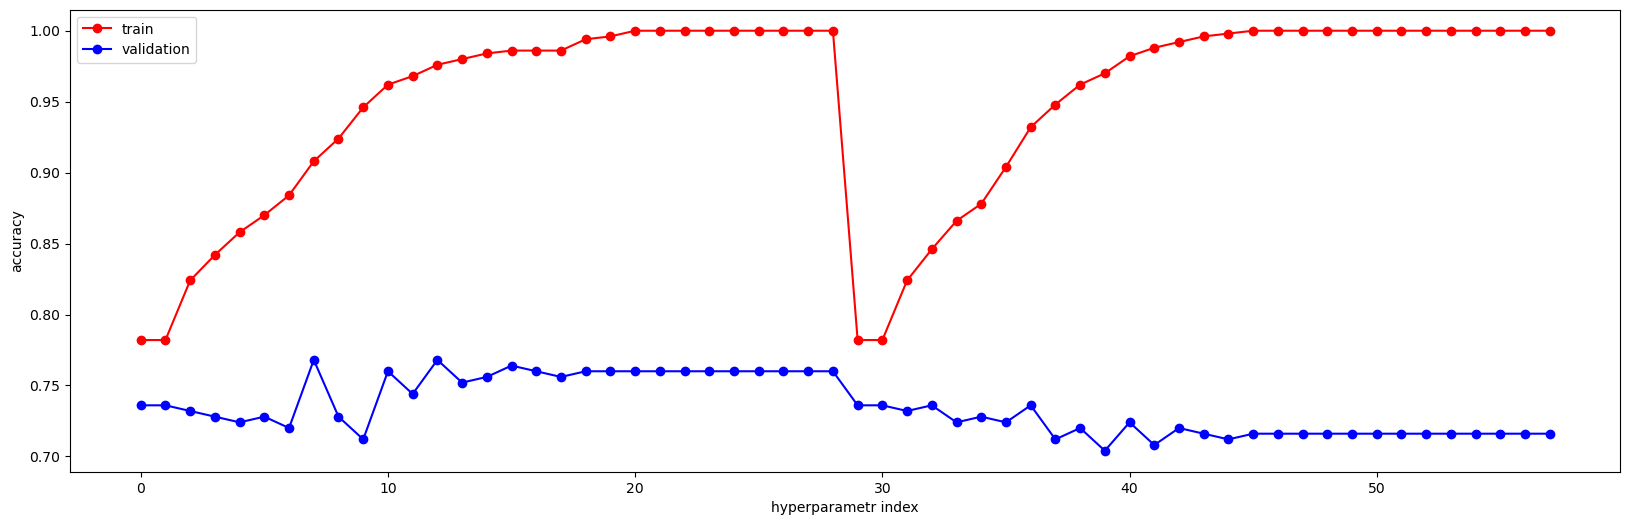

In [26]:
plt.figure(figsize=(20,6))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

Nechám si vypsat nejlepší hyparametry.

In [27]:
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
val_acc[np.argmax(val_acc)]

{'max_depth': 8, 'criterion': 'entropy'}


0.768

Nyní si natrénuji model se zjištěnými hodnmotami hyperparametrů. Zároveň si nechám vypsat trenénovací, validační a trestovací chybu. Přičemž testovací chyba představuje odhad přesnosti modelu na neznámých datech.

In [28]:
clf_tree = DecisionTreeClassifier(**best_params, random_state=rd_seed)
clf_tree.fit(Xtrain, ytrain)

tree_val_acc = metrics.accuracy_score(yval, clf_tree.predict(Xval))

print('accuracy score (train): {0:.3f}'.format(metrics.accuracy_score(ytrain, clf_tree.predict(Xtrain))))
print('accuracy score (validation): {0:.3f}'.format(tree_val_acc))

accuracy score (train): 0.908
accuracy score (validation): 0.768


### Evaluace modelu rozhodovacího stromu
Nejprve si nechám vypsat matici záměn, pro nahlédnují na predikce modelu.

In [29]:
ypred = clf_tree.predict(Xval)
print(metrics.confusion_matrix(yval, ypred))

print('''
TN | FP
-------
FN | TP
''')


[[122  19]
 [ 39  70]]

TN | FP
-------
FN | TP



In [30]:
Tree_precission = metrics.precision_score(yval, ypred)
Tree_tpr = metrics.accuracy_score(yval, ypred)
print("tree precision: {0:.3f}".format(Tree_precission))
print("tree tpr: {0:.3f}".format(Tree_tpr))

tree precision: 0.787
tree tpr: 0.768


Dále vypíši F1 skóre, UAC skóre a vykreslím ROC křivku.

In [31]:
f1 = metrics.f1_score(yval, ypred)
print(f"F1 score: {f1:.3}")

F1 score: 0.707


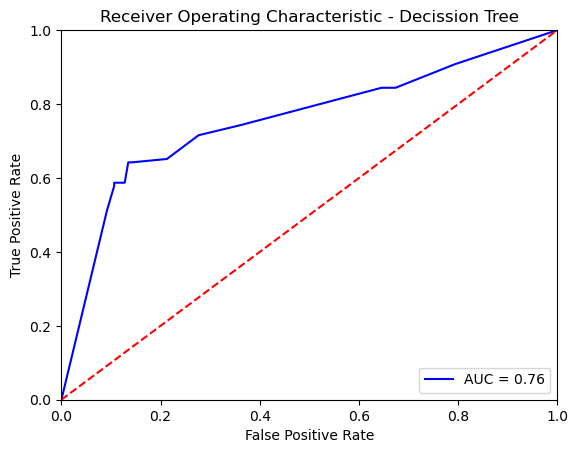

In [32]:
yprobs = clf_tree.predict_proba(Xval)
yprobs = yprobs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yval, yprobs)
auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - Decission Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## kNN

Nejprve jsem zkusil vyhodit z dat pro kNN původní strukturované počty rodinných příslušníků, kvůli snížení dimenzionality. Nicméně na validačních datech se ukázalo, že tato změna nemá pozitivní efekt.

In [33]:
# XtrainkN = Xtrain.drop('sibsp', axis = 1)
# XtrainkN = XtrainkN.drop('parch', axis = 1)
# XvalkN = Xval.drop('sibsp', axis = 1)
# XvalkN = XvalkN.drop('parch', axis = 1)

XtrainkN = Xtrain
XvalkN = Xval

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(XtrainkN)

Xval_scaled = scaler.transform(XvalkN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
param_gridkN = {     
    'n_neighbors': range(1,11), 
    'metric': ['minkowski', 'manhattan']
}
param_combkN = ParameterGrid(param_gridkN)

val_acckN = []
train_acckN = []

for params in param_combkN:
    clfkN_screen = KNeighborsClassifier(n_neighbors=params['n_neighbors'], metric=params['metric'])
    clfkN_screen.fit(Xtrain_scaled, ytrain)
    train_acckN.append(metrics.accuracy_score(ytrain, clfkN_screen.predict(Xtrain_scaled)))
    val_acckN.append(metrics.accuracy_score(yval, clfkN_screen.predict(Xval_scaled)))

In [37]:
best_paramskN = param_combkN[np.argmax(val_acckN)]
print(best_paramskN)
val_acckN[np.argmax(val_acckN)]

{'n_neighbors': 6, 'metric': 'minkowski'}


0.752

In [38]:
print(val_acckN)

[0.744, 0.732, 0.74, 0.724, 0.732, 0.752, 0.74, 0.74, 0.724, 0.728, 0.736, 0.72, 0.72, 0.724, 0.74, 0.724, 0.736, 0.736, 0.744, 0.74]


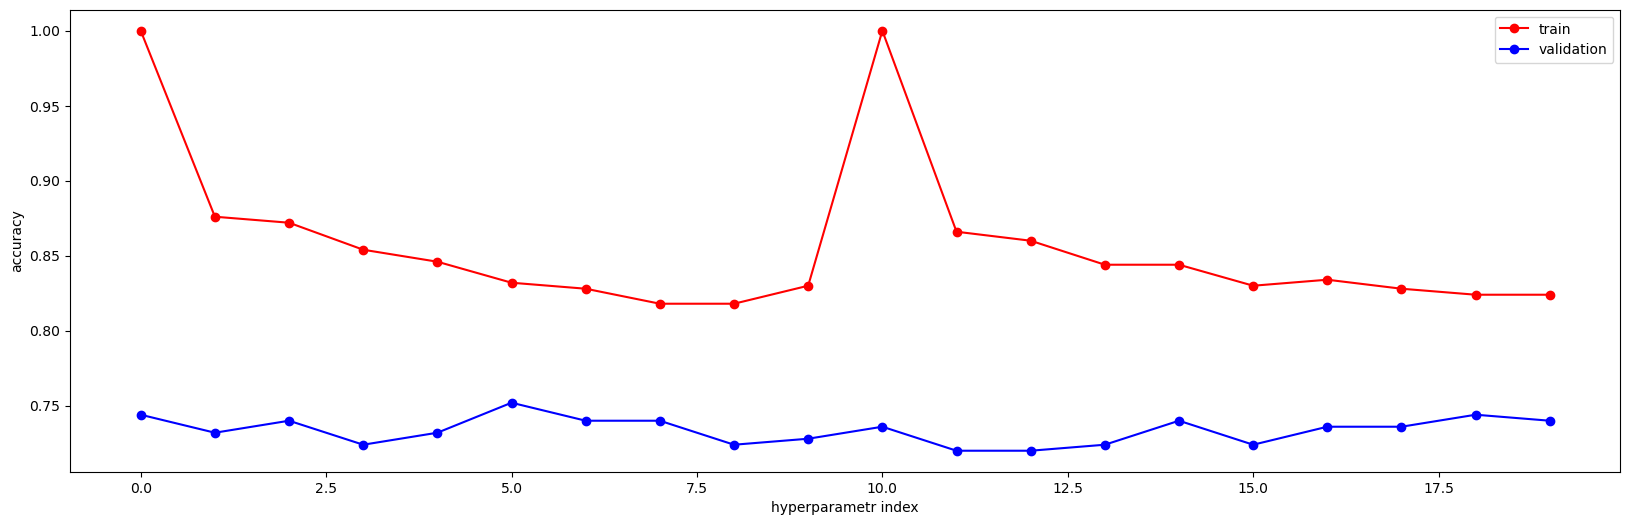

In [39]:
plt.figure(figsize=(20,6))
plt.plot(train_acckN,'or-')
plt.plot(val_acckN,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [40]:
clfkN = KNeighborsClassifier(**best_paramskN)
clfkN.fit(Xtrain_scaled, ytrain)

kNN_val_acc = metrics.accuracy_score(yval, clfkN.predict(Xval_scaled))

print('accuracy score (train): {0:.3f}'.format(metrics.accuracy_score(ytrain, clfkN.predict(Xtrain_scaled))))
print('accuracy score (validation): {0:.3f}'.format(kNN_val_acc))

accuracy score (train): 0.832
accuracy score (validation): 0.752


### Evaluace modelu nejbližšších sousedů
Opět si nejprve vypisi pravdivostni matici.

In [41]:
ypredkN = clfkN.predict(Xval_scaled)
print(metrics.confusion_matrix(yval, ypredkN))

print('''
TN | FP
-------
FN | TP
''')

[[120  21]
 [ 41  68]]

TN | FP
-------
FN | TP



In [42]:
f1kN = metrics.f1_score(yval, ypredkN)
print(f"F1 score: {f1}")

F1 score: 0.7070707070707072


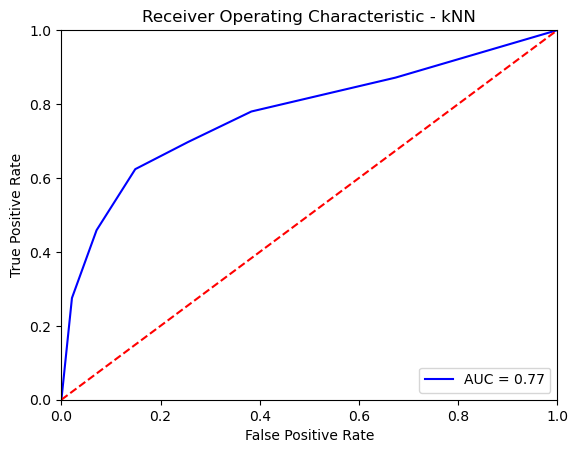

In [43]:
yprobs_knn = clfkN.predict_proba(Xval_scaled)
yprobs_knn = yprobs_knn[:,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(yval, yprobs_knn)
auc_knn = metrics.auc(fpr_knn, tpr_knn)

plt.title('Receiver Operating Characteristic - kNN')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Výběr nejlepšího modelu

Vypíši si významné metriky:

In [44]:
print(f"Validation accuracy: Tree {tree_val_acc:.3f}, kNN {kNN_val_acc:.3f}")
print(f"F1 score: Tree {f1:.3f}, kNN {f1kN:.3f}")
print(f"AUC score: Tree {auc:.3f}, kNN {auc_knn:.3f}")

Validation accuracy: Tree 0.768, kNN 0.752
F1 score: Tree 0.707, kNN 0.687
AUC score: Tree 0.755, kNN 0.773


Ve dvou ze tří metrik vychází lépe rozhodovací strom. Vzhledem k tomu, že se jedná právvě o celkovou accuracy a F1 skóre, bude vybrán jako finální model tento strom. Kdyby měl vyšší i AUC skóre, bylo by rozhodnutí jednoznačnější. Nicméně Oba modely mají AUC skóre podobné a v obou případech je vydět, že predikce nedělají zcela náhodně (ROC křivka je daleko od čárkované diagonály). 

In [45]:
df["survived"].sum() # cca 40% přežilo => lehce nevyvážený dataset, další důvod proč je F1 skóre významnější než AUC

398

### Odhad přesnosti na nových datech 

In [46]:
ypred_test = clf_tree.predict(Xtest)
print(metrics.confusion_matrix(ytest, ypred_test))

print('''
TN | FP
-------
FN | TP
''')

Tree_precission_test = metrics.precision_score(ytest, ypred_test)
Tree_tpr_test = metrics.accuracy_score(ytest, ypred_test)
print("Tree test precision: {0:.3f}".format(Tree_precission_test))
print("Tree test tpr: {0:.3f}".format(Tree_tpr_test))

f1_test = metrics.f1_score(ytest, ypred_test)
print(f"F1 score: {f1_test:.3f}")

[[137  26]
 [ 36  51]]

TN | FP
-------
FN | TP

Tree test precision: 0.662
Tree test tpr: 0.752
F1 score: 0.622


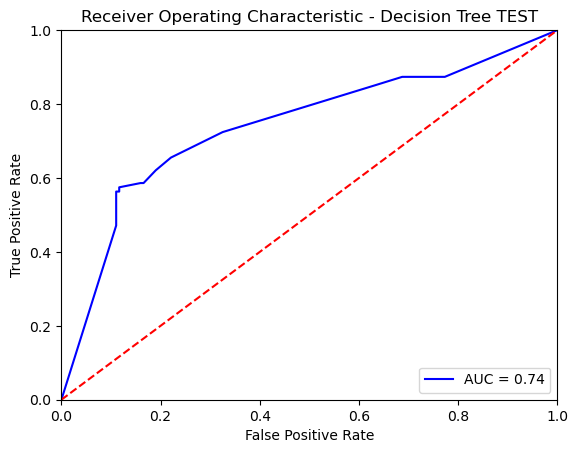

In [47]:
yprobs_test = clf_tree.predict_proba(Xtest)
yprobs_test = yprobs_test[:,1]
fpr_test, tpr_test, threshold_test = metrics.roc_curve(ytest, yprobs_test)
auc_test = metrics.auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic - Decision Tree TEST')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Predikce na neznámích datech

In [48]:
data_unknown = pd.read_table("evaluation.csv", sep = ",")
data_unknown

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C,NaN
1,1001,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,"New York, NY"
2,1002,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,"New York, NY"
3,1003,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,NaN
4,1004,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
304,1304,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S,"Southsea, Hants"
305,1305,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C,NaN
306,1306,3,"Fox, Mr. Patrick",male,NaN,0,0,368573,7.7500,NaN,Q,"Ireland New York, NY"
307,1307,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,NaN


Ověření, že mám skutečn2 stejné příznaky

In [49]:
display(df.columns)
display(data_unknown.columns)

set(df.columns) - set(data_unknown.columns)

Index(['ID', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'fam'],
      dtype='object')

Index(['ID', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest'],
      dtype='object')

{'fam', 'survived'}

In [50]:
display(data_unknown.shape)
display(data_unknown.info())
display(data_unknown.describe())
display(data_unknown.nunique())
display(data_unknown.dtypes)

(309, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        244 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       309 non-null    float64
 9   cabin      62 non-null     object 
 10  embarked   309 non-null    object 
 11  home.dest  179 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB


None

,ID,pclass,age,sibsp,parch,fare
count,309.000000,309.000000,244.000000,309.000000,309.000000,309.000000
mean,1154.000000,2.317152,29.981216,0.508091,0.330097,30.163106
std,89.344838,0.831442,14.718045,1.097858,0.670167,46.312684
min,1000.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,1077.000000,2.000000,21.000000,0.000000,0.000000,7.879200
50%,1154.000000,3.000000,29.000000,0.000000,0.000000,13.500000
75%,1231.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1308.000000,3.000000,71.000000,8.000000,5.000000,512.329200


ID           309
pclass         3
name         309
sex            2
age           68
sibsp          7
parch          4
ticket       284
fare         151
cabin         55
embarked       3
home.dest    134
dtype: int64

ID             int64
pclass         int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
home.dest     object
dtype: object

Úprava nových dat stejným způsobem, jako při trénování a validaci.

In [51]:
data_unknown["sex"] = data_unknown["sex"].astype("category").cat.codes    

data_unknown["embarked"] = data_unknown["embarked"].astype("category").cat.codes 
df.embarked = df.embarked.replace(0, -1)

data_unknown["fam"] = data_unknown["sibsp"] + data_unknown["parch"]

data_unknown = data_unknown.drop('home.dest', axis = 1)
data_unknown = data_unknown.drop('cabin', axis = 1)
data_unknown = data_unknown.drop('ticket', axis = 1)
data_unknown = data_unknown.drop('name', axis = 1)

data_unknown = data_unknown.fillna('-1')

data_unknown

,ID,pclass,sex,age,sibsp,parch,fare,embarked,fam
0,1000,3,1,33.0,0,0,8.6625,0,0
1,1001,1,0,-1,0,0,31.6833,2,0
2,1002,1,0,-1,1,0,133.6500,2,1
3,1003,3,1,47.0,0,0,9.0000,2,0
4,1004,1,0,58.0,0,0,146.5208,0,0
...,...,...,...,...,...,...,...,...,...
304,1304,2,1,25.0,0,0,13.0000,2,0
305,1305,3,1,34.5,0,0,6.4375,0,0
306,1306,3,1,-1,0,0,7.7500,1,0
307,1307,1,1,24.0,0,0,79.2000,0,0


Nyní na upravená data pošlu natrénovaný rozhodovací strom.

In [52]:
y_unknown_pred = clf_tree.predict(data_unknown)
y_unknown_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [53]:
prediction = pd.DataFrame()

prediction.rename(columns={'': 'ID'}, inplace=True)
prediction["ID"] = data_unknown["ID"]
prediction["survived"] = y_unknown_pred.tolist()

display(prediction)
display(prediction.columns)

,ID,survived
0,1000,1
1,1001,1
2,1002,1
3,1003,0
4,1004,1
...,...,...
304,1304,0
305,1305,1
306,1306,1
307,1307,0


Index(['ID', 'survived'], dtype='object')

Uložení do CSV

In [54]:
prediction.to_csv('results.csv')